In [1]:
import numpy as np
dx=0.0625/2
Nub_x_1=int(0.5/dx)
Nub_x_2=int(1.0/dx)
Nub_y=int(24)
Tinitial=273.15+50
dt=5
Nt=200000
r = dt*1.11*(10**(-4))/dx**2
q = 1+4*r
CoeSize=int(Nub_x_1-1+(2.5/dx-1)*(Nub_x_1+1)+(Nub_x_2+1)*(Nub_x_1)+(Nub_x_2-1))

In [2]:

DO=[[0 for i in range(Nub_x_1)] for i in range(Nub_x_1+1)]
imax=Nub_x_1+1
jmax=Nub_x_1
for i in range(1,imax-1):
    for j in range(0,jmax):
        if(i-1==j):
            DO[i][j]=-r
DB=[[0 for i in range(Nub_x_1-1)] for i in range(Nub_x_1+1)]
imax=Nub_x_1+1
jmax=Nub_x_1-1
for i in range(1,imax-1):
    for j in range(0,jmax):
        if(i-1==j):
            DB[i][j]=-r

LO=[[0 for i in range(Nub_x_1+1)] for i in range(Nub_x_1+1)]
imax=Nub_x_1+1
jmax=Nub_x_1-1
LO[0][0]=1
LO[0][1]=-1
LO[Nub_x_1][Nub_x_1-1]=1
LO[Nub_x_1][Nub_x_1]=-1
for i in range(1,imax-1):
    for j in range(0,jmax):
        LO[i][i-1]=-r
        LO[i][i]=q
        LO[i][i+1]=-r

LB=[[0 for i in range(Nub_x_1+1)] for i in range(Nub_x_1+1)]
imax=Nub_x_1+1
jmax=Nub_x_1+1
for i in range(1,imax-1):
    for j in range(0,jmax):
        if i==j:
            LB[i][j]=-r
LG=[[0 for i in range(2*Nub_x_1-1)] for i in range(Nub_x_1-1)]
imax=Nub_x_1-1
jmax=2*Nub_x_1-1
for i in range(0,imax):
    for j in range(0,jmax):
        if(i==j):
            LG[i][j]=1
        if(j-Nub_x_1==i):
            LG[i][j]=-1
            
DG=[[0 for i in range(Nub_x_1+Nub_x_2)] for i in range(Nub_x_1-1)]
imax=Nub_x_1-1
jmax=Nub_x_1+Nub_x_2
for i in range(0,imax):
    for j in range(0,Nub_x_1+Nub_x_2):
        if(i==j):
            DG[i][j]=1
        if(j-Nub_x_2-1==i):
            DG[i][j]=-1

VDG=[[0 for i in range(Nub_x_1+Nub_x_2-1)] for i in range(Nub_x_1-1)]
imax=Nub_x_1-1
jmax=Nub_x_1+Nub_x_2-1
for i in range(0,imax):
    for j in range(0,jmax):
        if(i==j):
            VDG[i][j]=1
        if(j-Nub_x_2==i):
            VDG[i][j]=-1

Y=[[0 for i in range(Nub_x_2)] for i in range(Nub_x_2+1)]
imax=Nub_x_2
jmax=Nub_x_2-1
for i in range(0,imax):
    for j in range(0,jmax):
        if i-1==j:
            Y[i][j]=-r
            
DR=[[0 for i in range(Nub_x_2+1)] for i in range(Nub_x_2+1)]
DR[0][0]=1
DR[0][1]=-1
DR[Nub_x_2][Nub_x_2-1]=1
DR[Nub_x_2][Nub_x_2]=-1
imax=Nub_x_2+1
jmax=Nub_x_2+1
for i in range(1,imax-1):
    for j in range(0,jmax):
        DR[i][i-1]=-r
        DR[i][i]=q
        DR[i][i+1]=-r
        
LR=[[0 for i in range(Nub_x_2+1)] for i in range(Nub_x_2+1)]
LR[0][0]=1
LR[0][1]=-1
LR[Nub_x_2][Nub_x_2]=1
imax=Nub_x_2+1
jmax=Nub_x_2+1
for i in range(1,imax-1):
    for j in range(0,jmax):
        LR[i][i-1]=-r
        LR[i][i]=q
        LR[i][i+1]=-r
        
LGR=[[0 for i in range(Nub_x_1)] for i in range(Nub_x_1)]
for i in range(0,Nub_x_1):
    for j in range(0,Nub_x_1):
        if(i==j):
            LGR[i][j]=1

DGR=[[0 for i in range(Nub_x_2+1)] for i in range(Nub_x_1+1)]
for i in range(1,Nub_x_1):
    for j in range(0,Nub_x_2+1):
        if(i==j-Nub_x_1):
            DGR[i][j]=-r

DBB=[[0 for i in range(Nub_x_2+1)] for i in range(Nub_x_2+1)]
for i in range(1,Nub_x_2):
    for j in range(0,Nub_x_2+1):
        if(i==j):
            DBB[i][i]=-r
            DBB[i][i]=-r
            
BP=[[0 for i in range(Nub_x_2-1)] for i in range(Nub_x_2+1)]
for i in range(1,Nub_x_2):
    for j in range(0,Nub_x_2-1):
        if(i==j+1):
            BP[i][j]=-r
            BP[i][j]=-r

In [3]:
from numpy.linalg import inv
import pandas as pd
Coe=[[0 for i in range(CoeSize)] for i in range(CoeSize)]
imin=0
imax=Nub_x_1-1
jmin=0
jmax=Nub_x_2-1
for i in range(0,imax):
    for j in range(0,jmax):
        Coe[i][j]=LG[i][j]
imin=imax
imax=imin+len(DB)
jmin=0
jmax=len(DB[0])+len(LO[0])+len(LB[0])
for i in range(imin,imax):
    for j in range(jmin,jmax):
        if(j<len(DB[0])):
            Coe[i][j]=DB[i-imin][j]
        if((len(DB[0])-1)<j<len(DB[0])+len(LO[0])):
            Coe[i][j]=LO[i-imin][j-len(DB[0])]
        if(len(DB[0])+len(LO[0])-1<j<len(DB[0])+len(LO[0])+len(LB[0])):
            Coe[i][j]=LB[i-imin][j-(len(DB[0])+len(LO[0]))]
imin=imax
imax=imax+len(DB)
jmin=len(DB[0])+1
jmax=jmin+len(DO[0])+len(LO[0])+len(LB[0])
for k in range(0,int(2.5/dx-1)-1):
    for i in range(imin,imax):
        for j in range(jmin,jmax):
            if(j<jmin+len(DO[0])):
                Coe[i][j]=DO[i-imin][j-jmin]
            if(jmin+len(DO[0])-1<j<(jmin+len(DO[0])+len(LO[0]))):
                Coe[i][j]=LO[i-imin][j-jmin-len(DO[0])]
            if(jmin+len(DO[0])+len(LO[0]))-1<j<(jmin+len(DO[0])+len(LO[0])+len(LB[0])):
                Coe[i][j]=LB[i-imin][j-jmin-len(DO[0])-len(LO[0])]
    imin=imin+len(DO)
    imax=imax+len(DO)
    jmin=jmin+len(DO[0])+1
    jmax=jmax+len(DO[0])+1

for i in range(imin,imax):
    for j in range(jmin,jmax):
            if(j<jmin+len(DO[0])):
                Coe[i][j]=DO[i-imin][j-jmin]
            if(jmin+len(DO[0])-1<j<(jmin+len(DO[0])+len(LO[0]))):
                Coe[i][j]=LO[i-imin][j-jmin-len(DO[0])]
for i in range(imin,imax):
    for j in range((jmin+len(DO[0])+len(LO[0])),(jmin+len(DO[0])+len(LO[0])+len(DGR[0]))):
        Coe[i][j]=DGR[i-imin][j-jmin-len(DO[0])-len(LO[0])]

jmin=(jmin+len(DO[0])+len(LO[0]))      
jmax=jmin+len(DG[0])
imin=imin+len(DGR)
imax=imin+len(DG)
for i in range(imin,imax):
    for j in range(jmin,jmax):
        Coe[i][j]=DG[i-imin][j-jmin]
Coe[imax][jmin+Nub_x_1-1]=1
imin=imax+1
imax=imin+len(Y)
jmin=jmin+Nub_x_1-Nub_x_2
jmax=jmin+len(Y[0])+len(LR[0])+len(DBB[0])
for k in range(0,int(Nub_x_1/2)):
    for i in range(imin,imax):
        for j in range(jmin,jmax):
            if (j<jmin+len(Y[0])):
                Coe[i][j]=Y[i-imin][j-jmin]
            if(jmin+len(Y[0])-1<j<jmin+len(Y[0])+len(LR[0])):
                Coe[i][j]=LR[i-imin][j-jmin-len(Y[0])]
            if(jmin+len(Y[0])+len(LR[0])-1<j<jmin+len(Y[0])+len(LR[0])+len(DBB[0])):
                Coe[i][j]=DBB[i-imin][j-jmin-len(Y[0])-len(LR[0])]
    jmin=jmin+len(Y)
    jmax=jmax+len(Y)
    imin=imin+len(Y)
    imax=imax+len(Y)
for k in range(0,int(Nub_x_1/2-1)):
    for i in range(imin,imax):
        for j in range(jmin,jmax):
            if (j<jmin+len(Y[0])):
                Coe[i][j]=Y[i-imin][j-jmin]
            if(jmin+len(Y[0])-1<j<jmin+len(Y[0])+len(LR[0])):
                Coe[i][j]=DR[i-imin][j-jmin-len(Y[0])]
            if(jmin+len(Y[0])+len(LR[0])-1<j<jmin+len(Y[0])+len(LR[0])+len(BP[0])):
                Coe[i][j]=BP[i-imin][j-jmin-len(Y[0])-len(LR[0])]    
    jmin=jmin+len(Y)
    jmax=jmax+len(Y)
    imin=imin+len(Y)
    imax=imax+len(Y)

jmin=jmin+len(Y[0])+1-len(Y)
jmax=jmin+len(VDG[0])
imin=imax-len(Y)
aaa=imin
imax=imin+len(VDG)
for i in range(imin,imax):
    for j in range(jmin,jmax):
        Coe[i][j]=VDG[i-imin][j-jmin]
        
jmin=jmax
jmax=jmin+len(LGR[0])
imin=imax
imax=imin+len(LGR)
for i in range(imin,imax):
    for j in range(jmin,jmax): 
        if(i==j):
            Coe[i][j]=LGR[i-imin][j-jmin]
        
df = pd.DataFrame(Coe) 


In [4]:
def assignbFromT(T):
    b=[0 for i in range(CoeSize)]
    bym=[0 for i in range(CoeSize)]
    k=Nub_x_1-2
    for i in range (len(T)):
        for j in range(len(T[i])):
            if(0<i<int(3.0/dx-Nub_x_1)):
                if(j==len(T[i])-1):
                    k=k+1
                    b[k]=0
                    bym[k]=0
                if(j==0):
                    k=k+1
                    b[k]=0
                    bym[k]=0
                if(0<j<len(T[i])-1):
                    k=k+1
                    b[k]=T[i][j]
                    bym[k]='T'+str(i)+str(j)
            if(i==int(3.0/dx-Nub_x_1)):
                if(j==0):
                    k=k+1
                    b[k]=0
                    bym[k]=0
                if(0<j<Nub_x_1):
                    k=k+1
                    b[k]=T[i][j]
                    bym[k]='T'+str(i)+str(j)
                if(j>Nub_x_1-1):
                    k=k+1
                    b[k]=0
                    bym[k]=0
                
            if(int(3.0/dx-Nub_x_1)<i<int(3.0/dx)):
                if(j==len(T[i])-1):
                    k=k+1
                    b[k]=0
                    bym[k]=0
                elif(j==0):
                    k=k+1
                    b[k]=0
                    bym[k]=0
                else:
                    k=k+1
                    b[k]=T[i][j]
                    bym[k]='T'+str(i)+str(j)
            
    b[int(Nub_x_1-1+(Nub_x_1+1)*(3.0/dx-Nub_x_1-1)+(0.25/dx+1)*(Nub_x_2+1)-1)]=Tinitial
    for i in range(0,int(0.25/dx)):
        b[int(Nub_x_1-1+(Nub_x_1+1)*(3.0/dx-Nub_x_1-1)+(i+1)*(Nub_x_2+1)-1)]=373.15
        bym[int(Nub_x_1-1+(Nub_x_1+1)*(3.0/dx-Nub_x_1-1)+(i+1)*(Nub_x_2+1)-1)]=373.15
    
    for i in range(0,int(0.5/dx)):
        b[int(Nub_x_1-1+(Nub_x_1+1)*(3.0/dx-Nub_x_1-1)+Nub_x_1*(Nub_x_2+1)-1+Nub_x_1+i)]=273.15
        bym[int(Nub_x_1-1+(Nub_x_1+1)*(3.0/dx-Nub_x_1-1)+Nub_x_1*(Nub_x_2+1)-1+Nub_x_1+i)]=273.15

    return b

In [5]:
def TlistToT(Tist):
    Ta=[]
    aa=[Tinitial for i in range(Nub_x_1+1)]

    for i in range (0,int(3.0/dx+1)):

        if (0<=i<int(3.0/dx-Nub_x_1)):
            aa=[Tinitial for i in range(Nub_x_1+1)]
            Ta.append(aa)  
        if (i>int(3.0/dx-Nub_x_1)-1 and i<int(3.0/dx+1)):
            aa=aa=[Tinitial for i in range(Nub_x_2+1)]
            Ta.append(aa)  
#T=np.array(T)
    k=0

    for i in range (len(Ta)):
        for j in range(len(Ta[i])):
            if i==0 and 0<j<int(len(Ta[i])-1):
                Ta[i][j]=Tist[k]
                k=k+1
            if 0<i<int(3.0/dx):
                Ta[i][j]=Tist[k]
                k=k+1
            if i==int(3.0/dx): 
                if j==0:
                    1==1
                if j==int(Nub_x_2):
                    1==1
                if 0<j<int(Nub_x_2-1):
                    k=k+1
                    Ta[i][j]=Tist[k]
    return Ta

In [6]:
def Tsquat(T):
    TS=[[0 for i in range(Nub_x_2+1)] for i in range(int(3/dx+1))]
    for i in range (len(T)):
        for j in range(len(T[i])):
            TS[i][j]=T[i][j]
    return TS

In [7]:
# Correct index
T=[]
a=[Tinitial for i in range(Nub_x_1+1)]

for i in range (0,int(3.0/dx+1)):

    if (0<=i<int(3.0/dx-Nub_x_1)):
        a=[Tinitial for i in range(Nub_x_1+1)]
        T.append(a)  
    if (i>int(3.0/dx-Nub_x_1)-1 and i<int(3.0/dx+1)):
        a=a=[Tinitial for i in range(Nub_x_2+1)]
        T.append(a)  
#T=np.array(T)
b=assignbFromT(T)
InvCoe=inv(Coe)
Tist=[[0 for i in range(CoeSize)] for i in range(Nt+1)]
for i in range(Nt-1):
    Parm=np.matmul(InvCoe,b)
    
    T=TlistToT(Parm)
    Tist[i]=Parm
    b=assignbFromT(T)


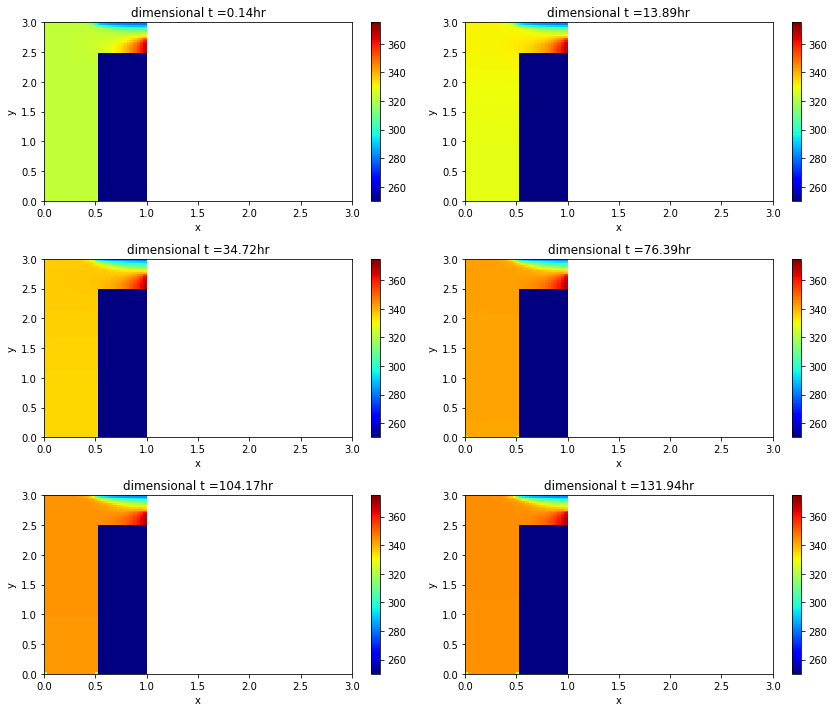

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
x=np.arange(0,1+dx,dx)
y=np.arange(0,3+dx,dx)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize = (12,10))

plt.subplot(321)
Z=Tsquat(TlistToT(Tist[100]))
#plt.figure(figsize=(12,12))
pcol = plt.pcolor(X,Y,Z, cmap = 'jet', norm=mpl.colors.Normalize(vmin=250, vmax=375))
plt.xlim([0,3])
plt.colorbar(pcol)
plt.title('dimensional t ='+str(round(dt*100/3600,2))+'hr')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(322)
Z=Tsquat(TlistToT(Tist[10000]))
#plt.figure(figsize=(12,12))
pcol = plt.pcolor(X,Y,Z, cmap = 'jet', norm=mpl.colors.Normalize(vmin=250, vmax=375))
plt.xlim([0,3])
plt.colorbar(pcol)
plt.title('dimensional t ='+str(round(dt*10000/3600,2))+'hr')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(323)
Z=Tsquat(TlistToT(Tist[25000]))
#plt.figure(figsize=(12,12))
pcol = plt.pcolor(X,Y,Z, cmap = 'jet', norm=mpl.colors.Normalize(vmin=250, vmax=375))
plt.xlim([0,3])
plt.colorbar(pcol)
plt.title('dimensional t ='+str(round(dt*25000/3600,2))+'hr')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(324)
Z=Tsquat(TlistToT(Tist[55000]))
#plt.figure(figsize=(12,12))
pcol = plt.pcolor(X,Y,Z, cmap = 'jet', norm=mpl.colors.Normalize(vmin=250, vmax=375))
plt.xlim([0,3])
plt.colorbar(pcol)
plt.title('dimensional t ='+str(round(dt*55000/3600,2))+'hr')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(325)
Z=Tsquat(TlistToT(Tist[75000]))
#plt.figure(figsize=(12,12))
pcol = plt.pcolor(X,Y,Z, cmap = 'jet', norm=mpl.colors.Normalize(vmin=250, vmax=375))
plt.xlim([0,3])
plt.colorbar(pcol)
plt.title('dimensional t ='+str(round(dt*75000/3600,2))+'hr')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(326)
Z=Tsquat(TlistToT(Tist[95000]))
#plt.figure(figsize=(12,12))
pcol = plt.pcolor(X,Y,Z, cmap = 'jet', norm=mpl.colors.Normalize(vmin=250, vmax=375))
plt.xlim([0,3])
plt.colorbar(pcol)
plt.title('dimensional t ='+str(round(dt*95000/3600,2))+'hr')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

Text(0,0.5,'y')

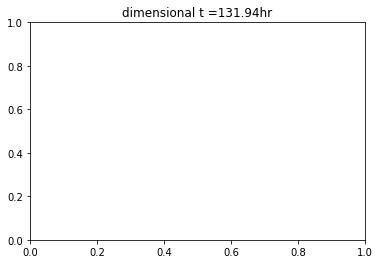

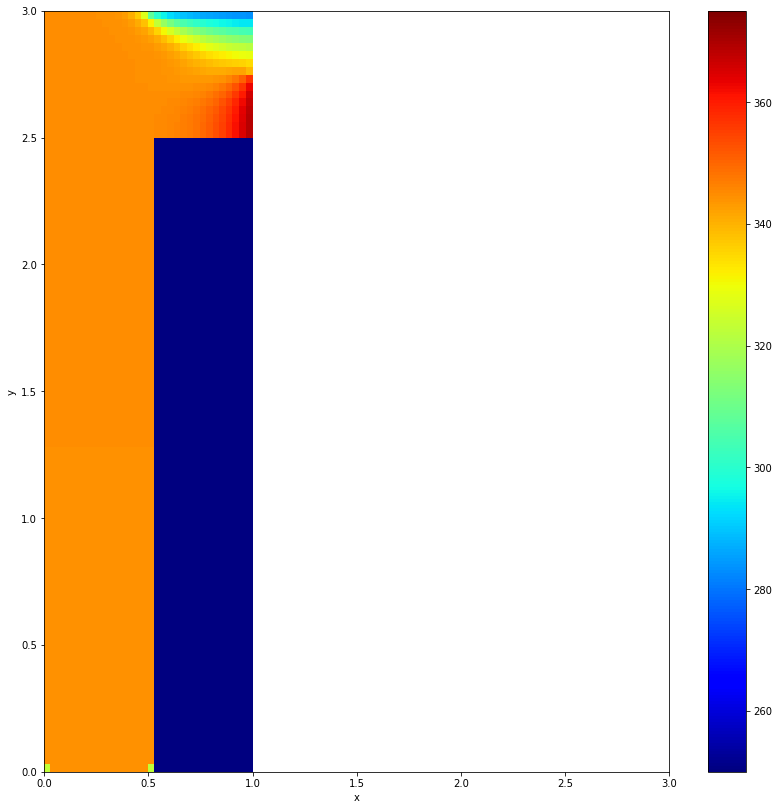

In [14]:
Z=Tsquat(TlistToT(Tist[95000]))
#plt.figure(figsize=(12,12))


plt.title('dimensional t ='+str(round(dt*95000/3600,2))+'hr')
plt.figure(figsize=(14,14))
pcol = plt.pcolor(X,Y,Z, cmap = 'jet', norm=mpl.colors.Normalize(vmin=250, vmax=375))
plt.xlim([0,3])
plt.colorbar(pcol)
plt.xlabel('x')
plt.ylabel('y')